In [91]:
from fenics import *
from mshr import *
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline

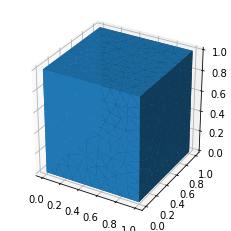

In [92]:
a = 1.0
box = Box(Point(0.0, 0.0, 0.0), Point(a, a, a))
mesh = generate_mesh(box, 16)
plot(mesh)

In [93]:
V = FunctionSpace(mesh, 'N1curl', 1)

# Set boundary conditions
u_D = Expression(('0.0', '0.0', 'x[0]*x[1]*(x[0] + x[1]) / 2.0'), degree=2)
bc = DirichletBC(V, u_D, 'on_boundary')

3.7611260959986104


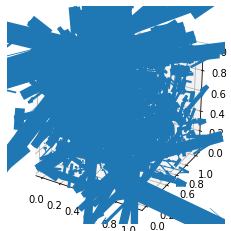

In [94]:
# Define variational problem
A = TrialFunction(V)
v = TestFunction(V)

mu = 1.0
a_stiff = (1 / mu)*dot(curl(A), curl(v))*dx
a_mass = (1 / mu)*dot(A, v)*dx
omega = 0.0
a = a_stiff - omega**2 * a_mass
J = Expression(('0.0', '0.0', '-x[0]-x[1]'), degree=1)
L = dot(J, v)*dx

# Solve variational problem
A = Function(V)
solve(a == L, A, bc)

# Plot vector potential
plot(A)

# Print error norm
print(errornorm(u_D, A, 'Hcurl'))

In [95]:
def export_form_as_sparse_matrix(a, fname):
    """
    Export form as sparse matrix
    
    Reference
    ---------
    https://fenicsproject.org/qa/14194/how-to-dump-fenics-matrix-to-an-text-file-matrix-market-format/
    """
    M = assemble(a)
    Mmat = as_backend_type(M).mat()
    mat = coo_matrix(csr_matrix(Mmat.getValuesCSR()[::-1]))

    np.savetxt(fname+'.txt',
               np.c_[mat.row, mat.col, mat.data],
               fmt=['%d', '%d', '%.16f']) 

In [ ]:
def export_field_as_sparse_matrix(A, fname):
    """
    Export vector field as sparse matrix
    
    Reference
    ---------
    https://fenicsproject.org/qa/14194/how-to-dump-fenics-matrix-to-an-text-file-matrix-market-format/
    """
    M = assemble(a)
    Mmat = as_backend_type(M).mat()
    mat = coo_matrix(csr_matrix(Mmat.getValuesCSR()[::-1]))

    np.savetxt(fname+'.txt',
               np.c_[mat.row, mat.col, mat.data],
               fmt=['%d', '%d', '%.16f']) 

In [96]:
export_form_as_sparse_matrix(a_stiff, "a_stiff")
export_form_as_sparse_matrix(a_mass, "a_mass")

In [129]:
x = V.tabulate_dof_coordinates()
x = x.reshape((-1, mesh.geometry().dim()))

#np.savetxt("A.txt", zip(x[:,0], x[:,1], x[:,2], A.vector()[:]))